<a href="https://colab.research.google.com/github/ar1vit0r/paipe/blob/main/Paipe_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install odfpy # dependencia necessária para carregar um arquivo .ods

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [65]:
df_test = pd.read_csv('test_houses.csv', delimiter=',')

In [66]:
df_train = pd.read_excel('train_houses.ods')  # colunas mal delimitadas nos dados de treinamento

In [67]:
# Carregar o CSV que tem os dados em uma única coluna, com a primeira linha como rótulo
df_train.to_csv('train_houses.csv', index=False)
df_train = pd.read_csv('train_houses.csv', delimiter=',')

# Dividir a coluna com base no delimitador ','
df_train = df_train.iloc[:, 0].str.split(',', expand=True)
df_train.to_csv('train_houses.csv', index=False)

In [68]:
cols_to_drop = df_train.columns[-4:]  # para igualar o número de colunas dos dataframes, removi as colunas finais pois são nulas
df_train = df_train.drop(columns=cols_to_drop)
df_train = df_train.drop(columns=df_train.columns[0]) # como não é citada no arquivo pdf, nem consta no dataframe de teste, a primeira coluna foi removida
df_train.columns = df_test.columns

In [69]:
df_train.describe()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
count,325260,325260,325260,325260,325260,325260,325260,325260,325260,325260,...,325260,325260,325260,325260,325260,325260,325260,325260,325260,162520
unique,6,60,51,60,1453,1688,668,70,38,34,...,314,242,135,117,96,92,86,66,499,428
top,Residential Area,,Tokyo,Tokyo,Ota Ward,Hachioji,8,6,6.0,,...,,60.0,80.0,200.0,2013,3,,,,20000000
freq,157201,147639,177621,147639,9497,2294,12563,14309,26790,183283,...,148468,73060,109546,41287,13830,42317,163323,168228,156789,5040


In [70]:
df_test.describe()

,Region,MinTimeToNearestStation,MaxTimeToNearestStation,Area,AreaIsGreaterFlag,UnitPrice,LandShape,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,Classification,CoverageRatio,Year,Quarter,TradePrice
count,40888.000000,75478.000000,34966.000000,77520.000000,5.236100e+04,1.572900e+04,37187.000000,40888.000000,60208.000000,76624.000000,39965.000000,76329.000000,77520.000000,36632.000000,0.0
mean,13152.983027,11.161120,7.955442,22.742402,1.267519e+05,1.394734e+06,9.437492,0.002079,783.806471,931.321388,5.860313,128.147231,952.448207,2.488453,NaN
std,49.602932,11.358499,6.924323,30.385132,3.037766e+05,1.410481e+06,6.487892,0.045548,977.078990,996.234186,4.145343,97.574302,1003.609954,1.122984,NaN
min,13101.000000,0.000000,0.000000,0.000000,0.000000e+00,5.400000e+01,0.400000,0.000000,0.000000,0.000000,1.000000,30.000000,1.000000,1.000000,NaN
25%,13113.000000,5.000000,4.000000,0.000000,0.000000e+00,6.800000e+05,5.700000,0.000000,0.000000,0.000000,4.000000,60.000000,2.000000,1.000000,NaN
50%,13121.000000,8.000000,7.000000,0.000000,0.000000e+00,1.100000e+06,8.000000,0.000000,0.000000,0.000000,5.000000,80.000000,4.000000,2.000000,NaN
75%,13207.000000,13.000000,10.000000,45.000000,1.600000e+05,1.800000e+06,11.000000,0.000000,2002.000000,1999.000000,6.000000,200.000000,2013.000000,3.000000,NaN
max,13421.000000,120.000000,120.000000,1000.000000,1.300000e+07,4.200000e+07,50.000000,1.000000,2020.000000,2019.000000,60.000000,1300.000000,2019.000000,4.000000,NaN


Arrumando tipos dos dados

In [71]:
df_train['MinTimeToNearestStation'] = pd.to_numeric(df_train['MinTimeToNearestStation'], errors='coerce')
df_train['MaxTimeToNearestStation'] = pd.to_numeric(df_train['MaxTimeToNearestStation'], errors='coerce')
df_train['Area'] = pd.to_numeric(df_train['Area'], errors='coerce')
df_train['UnitPrice'] = pd.to_numeric(df_train['UnitPrice'], errors='coerce')
df_train['Frontage'] = pd.to_numeric(df_train['Frontage'], errors='coerce')
df_train['TotalFloorArea'] = pd.to_numeric(df_train['TotalFloorArea'], errors='coerce')
df_train['BuildingYear'] = pd.to_numeric(df_train['BuildingYear'], errors='coerce')
df_train['CoverageRatio'] = pd.to_numeric(df_train['CoverageRatio'], errors='coerce')
df_train['AreaIsGreaterFlag'] = pd.to_numeric(df_train['AreaIsGreaterFlag'], errors='coerce')
df_train['FrontageIsGreaterFlag'] = pd.to_numeric(df_train['FrontageIsGreaterFlag'], errors='coerce')
df_train['TotalFloorAreaIsGreaterFlag'] = pd.to_numeric(df_train['TotalFloorAreaIsGreaterFlag'], errors='coerce')
df_train['PrewarBuilding'] = pd.to_numeric(df_train['PrewarBuilding'], errors='coerce')
df_train['FloorAreaRatio'] = pd.to_numeric(df_train['FloorAreaRatio'], errors='coerce')
df_train['TradePrice'] = pd.to_numeric(df_train['TradePrice'], errors='coerce')

In [72]:
df_test['MinTimeToNearestStation'] = pd.to_numeric(df_test['MinTimeToNearestStation'], errors='coerce')
df_test['MaxTimeToNearestStation'] = pd.to_numeric(df_test['MaxTimeToNearestStation'], errors='coerce')
df_test['Area'] = pd.to_numeric(df_test['Area'], errors='coerce')
df_test['UnitPrice'] = pd.to_numeric(df_test['UnitPrice'], errors='coerce')
df_test['Frontage'] = pd.to_numeric(df_test['Frontage'], errors='coerce')
df_test['TotalFloorArea'] = pd.to_numeric(df_test['TotalFloorArea'], errors='coerce')
df_test['BuildingYear'] = pd.to_numeric(df_test['BuildingYear'], errors='coerce')
df_test['CoverageRatio'] = pd.to_numeric(df_test['CoverageRatio'], errors='coerce')
df_test['AreaIsGreaterFlag'] = pd.to_numeric(df_test['AreaIsGreaterFlag'], errors='coerce')
df_test['FrontageIsGreaterFlag'] = pd.to_numeric(df_test['FrontageIsGreaterFlag'], errors='coerce')
df_test['TotalFloorAreaIsGreaterFlag'] = pd.to_numeric(df_test['TotalFloorAreaIsGreaterFlag'], errors='coerce')
df_test['PrewarBuilding'] = pd.to_numeric(df_test['PrewarBuilding'], errors='coerce')
df_test['FloorAreaRatio'] = pd.to_numeric(df_test['FloorAreaRatio'], errors='coerce')
df_test['TradePrice'] = pd.to_numeric(df_test['TradePrice'], errors='coerce')

Corrigidos os problemas na delimitação dos dados, começa o tratamento

Preenchimento dos valores numéricos faltantes utilizando a média

In [73]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64'])
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64'])

df_train_numeric = df_train.select_dtypes(include=['number']).fillna(df_train_numeric.mean())
df_test_numeric = df_test.select_dtypes(include=['number']).fillna(df_test_numeric.mean())

# Combine back the numeric and non-numeric columns
df_train_non_numeric = df_train.select_dtypes(exclude=['number'])  # Non-numeric columns are left unchanged
df_test_non_numeric = df_test.select_dtypes(exclude=['number'])

df_train = pd.concat([df_train_numeric, df_train_non_numeric], axis=1)
df_test = pd.concat([df_test_numeric, df_test_non_numeric], axis=1)

In [74]:
df_train = df_train.dropna() # remove valores faltantes das outras variáveis

Não foi possivel realizar o dropna no dataframe de teste, visto que todas as linhas, possuem pelo menos um valor faltante, o que acaba removendo todas as linhas do dataframe

In [75]:
#df_temp = df_test.drop(columns=['TradePrice'])
#df_temp = df_temp.dropna()
#df_test = df_test.loc[df_temp.index]

Remover valores duplicados

In [76]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

Eliminação de váriaveis


Quando você tem variáveis ​​categóricas com muitas categorias exclusivas, como DistrictName, Municipality, NearestStation, landshape... A codificação one-hot  cria muitas colunas, o que retarda o treinamento ou pode levar ao overfitting. Eu poderia codificar as categorias com base em sua frequência ou valor médio da variável alvo, porém não vi necessidade visto o alto numero de features numéricas(melhor para modelos de regressão).

In [77]:
#one hot encode categorical variables
#df_train = pd.get_dummies(df_train, columns=['Type', 'Region'], drop_first=True)
#df_test = pd.get_dummies(df_test, columns=['Type', 'Region'], drop_first=True)

# Apply label encoding to ordinal variables
le = LabelEncoder()
df_train['Purpose'] = le.fit_transform(df_train['Purpose'])
df_test['Purpose'] = le.fit_transform(df_test['Purpose'])

columns_to_drop = ['Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality', 'DistrictName', 'NearestStation','TimeToNearestStation', 'FloorPlan', 'PricePerTsubo', 'LandShape', 'Structure', 'Use', 'Direction', 'Classification', 'Breadth', 'CityPlanning', 'Period', 'Year', 'Quarter', 'Renovation', 'Remarks'] # data/time? TimeToNearestStation and year
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322779 entries, 0 to 325259
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MinTimeToNearestStation      322779 non-null  float64
 1   MaxTimeToNearestStation      322779 non-null  float64
 2   Area                         322779 non-null  float64
 3   AreaIsGreaterFlag            322779 non-null  float64
 4   UnitPrice                    322779 non-null  float64
 5   Frontage                     322779 non-null  float64
 6   FrontageIsGreaterFlag        322779 non-null  float64
 7   TotalFloorArea               322779 non-null  float64
 8   TotalFloorAreaIsGreaterFlag  322779 non-null  float64
 9   BuildingYear                 322779 non-null  float64
 10  PrewarBuilding               322779 non-null  float64
 11  CoverageRatio                322779 non-null  float64
 12  FloorAreaRatio               322779 non-null  float64
 13  Trad

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76950 entries, Pre-owned Condominiums to Pre-owned Condominiums
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MinTimeToNearestStation      76950 non-null  float64
 1   MaxTimeToNearestStation      76950 non-null  float64
 2   Area                         76950 non-null  float64
 3   AreaIsGreaterFlag            76950 non-null  float64
 4   UnitPrice                    76950 non-null  float64
 5   Frontage                     76950 non-null  float64
 6   FrontageIsGreaterFlag        76950 non-null  float64
 7   TotalFloorArea               76950 non-null  float64
 8   TotalFloorAreaIsGreaterFlag  76950 non-null  float64
 9   BuildingYear                 76950 non-null  float64
 10  PrewarBuilding               76950 non-null  float64
 11  CoverageRatio                76950 non-null  float64
 12  FloorAreaRatio               76950 non-nu

 Drop Unimportant Categorical Variables

as variaveis restantes são  Date/Time Variables: Not all categorical variables might be useful for the prediction task. It’s good to check their correlation with the target variable (TradePrice) using methods like:

Chi-Square Test: To check the relationship between categorical variables and the target.

Analise de amostra dos dados de treinamento

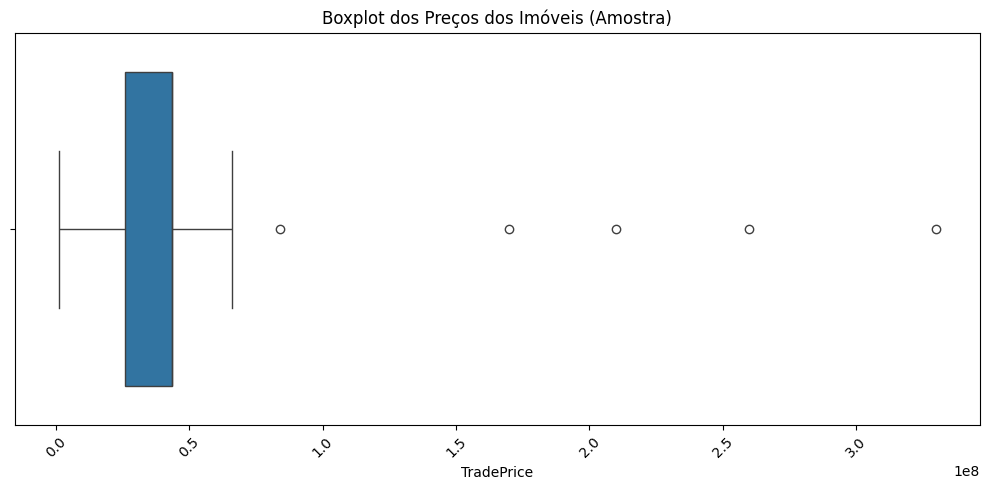

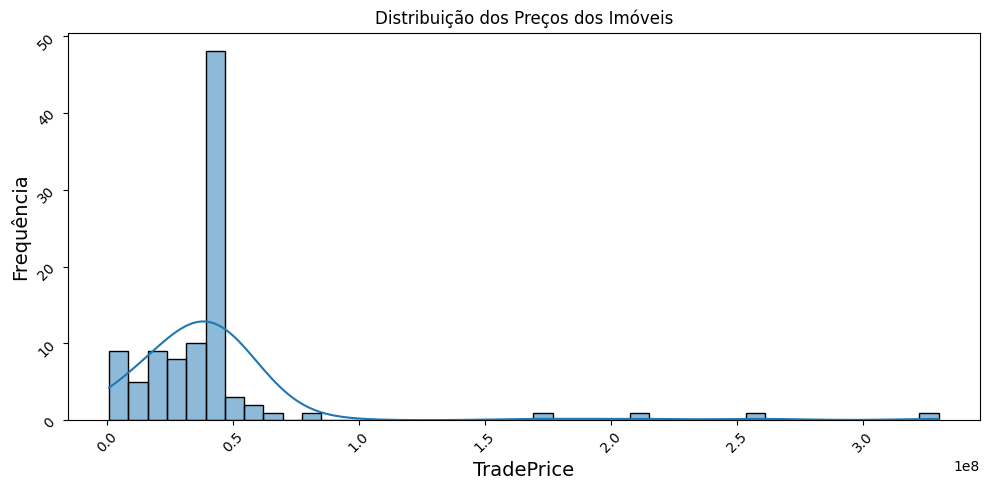

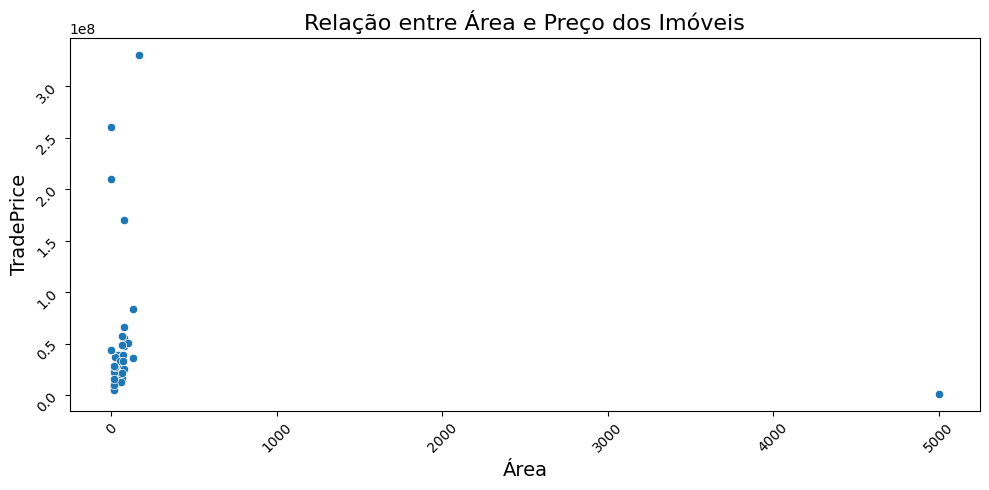

In [80]:
# Amostragem para melhor visualização
sample_data = df_train.sample(n=100, random_state=42)

# Gráfico de caixa para preços
plt.figure(figsize=(10, 5))
sns.boxplot(x=sample_data['TradePrice'])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Boxplot dos Preços dos Imóveis (Amostra)')
plt.xlabel('TradePrice')
plt.tight_layout()
plt.show()

# Análise Exploratória
# Insight 1: Distribuição dos Preços
plt.figure(figsize=(10, 5))
sns.histplot(sample_data['TradePrice'], kde=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('TradePrice', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()

# Insight 2: Relação entre Preço e Área
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Area', y='TradePrice', data=sample_data) # grafico de dispersão
plt.title('Relação entre Área e Preço dos Imóveis', fontsize=16)
plt.xlabel('Área', fontsize=14)
plt.ylabel('TradePrice', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Percebe-se que existem muito mais imóveis de menor preço

Também é possível perceber que imóveis mais baratos possuem uma área menor

In [81]:
# Define a function to plot histograms for each feature
def plot_histograms(df):
    num_features = len(df.columns)
    num_cols = 3  # Number of columns for subplot
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Number of rows needed

    plt.figure(figsize=(10, num_rows * 5))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        df[column].hist(bins=30, edgecolor='black')
        plt.title(column)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

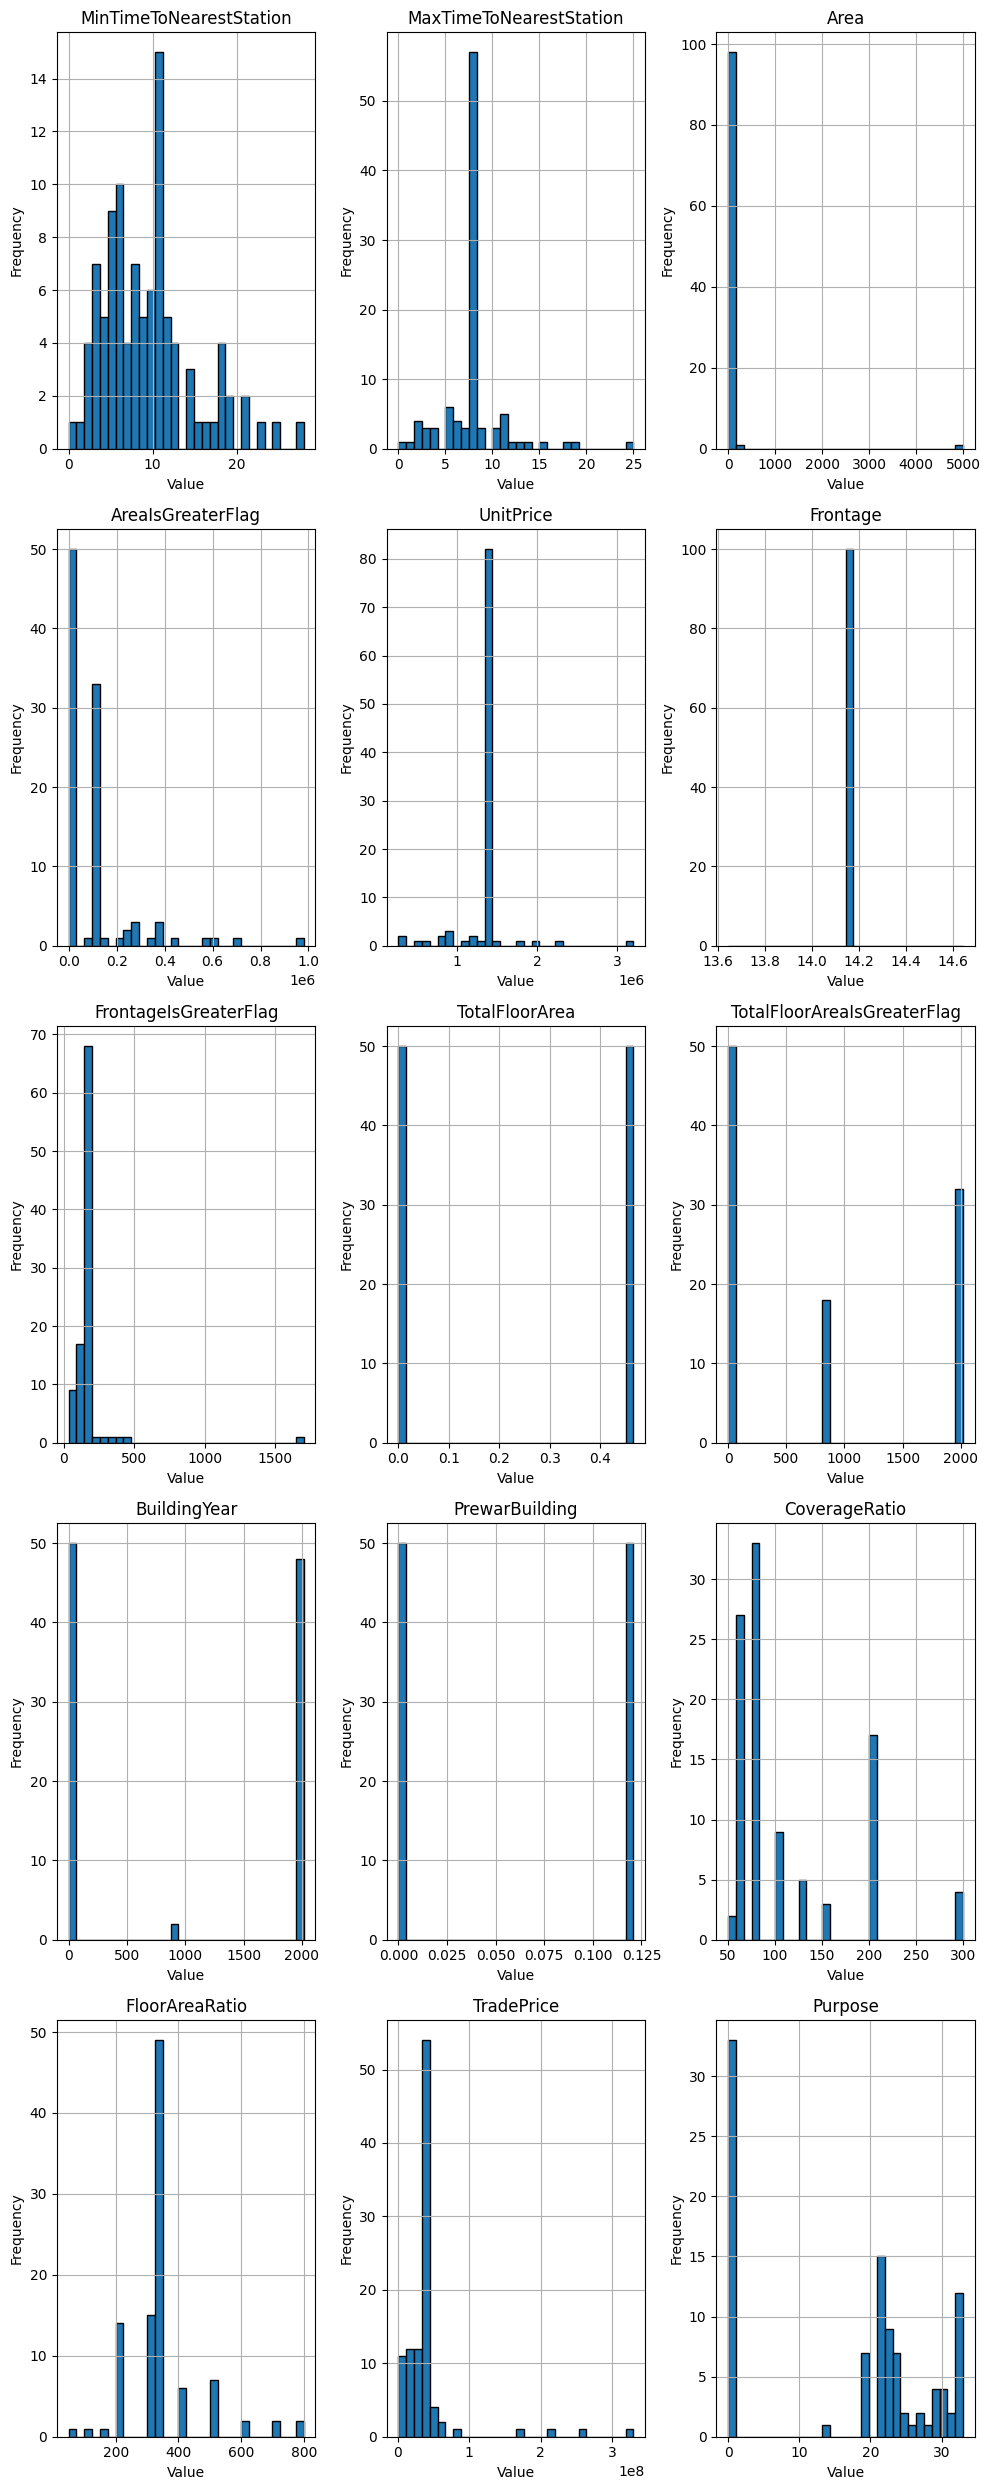

In [82]:
plot_histograms(sample_data)

In [83]:
df_train_numeric_sample = sample_data.select_dtypes(include=['float64', 'int64'])

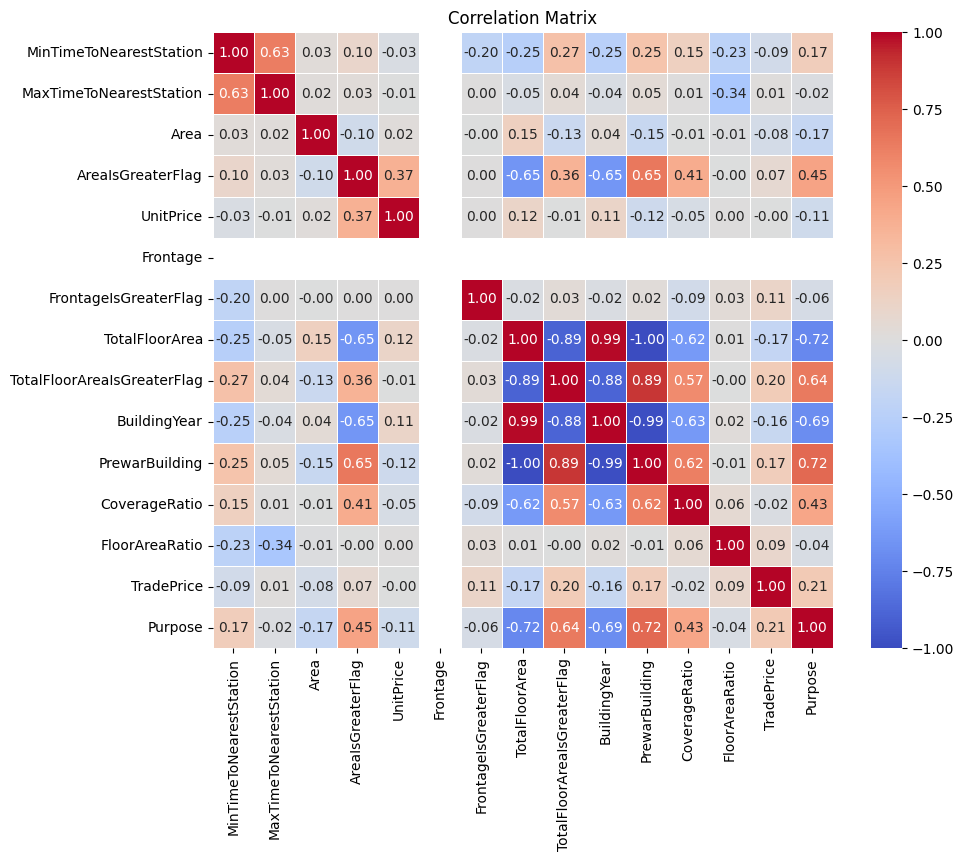

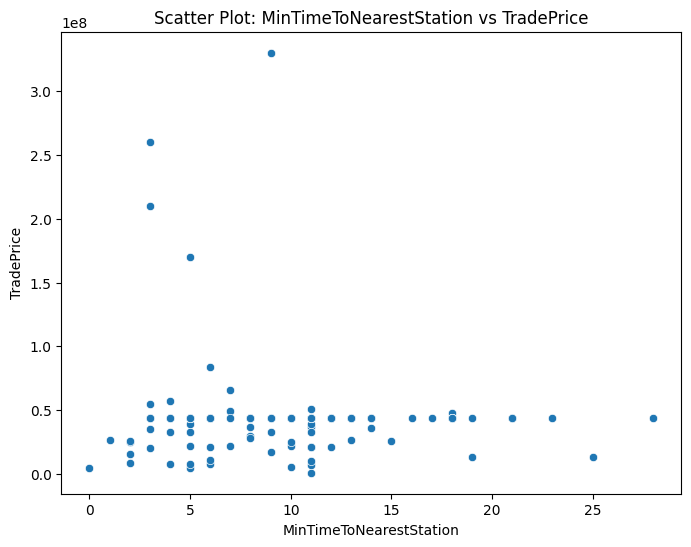

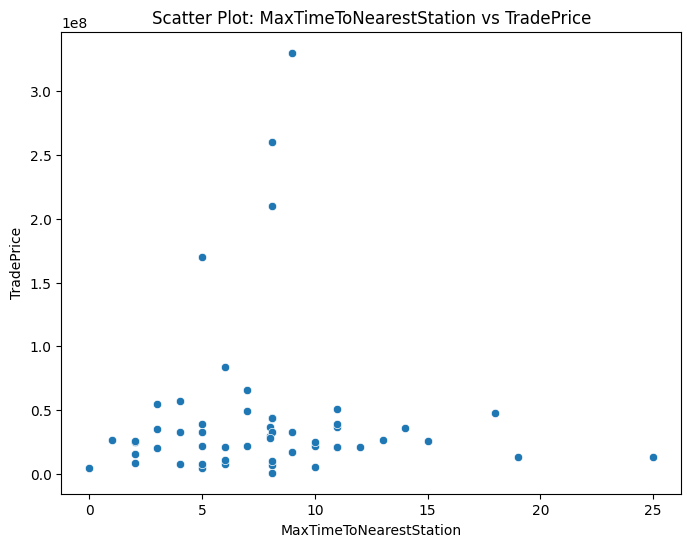

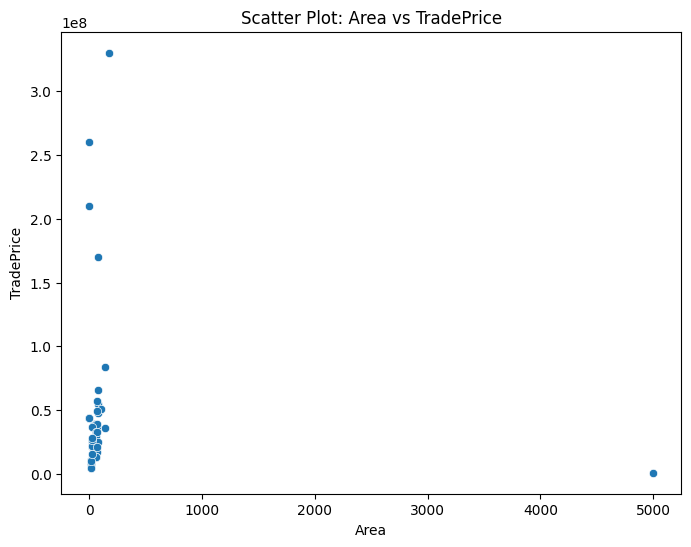

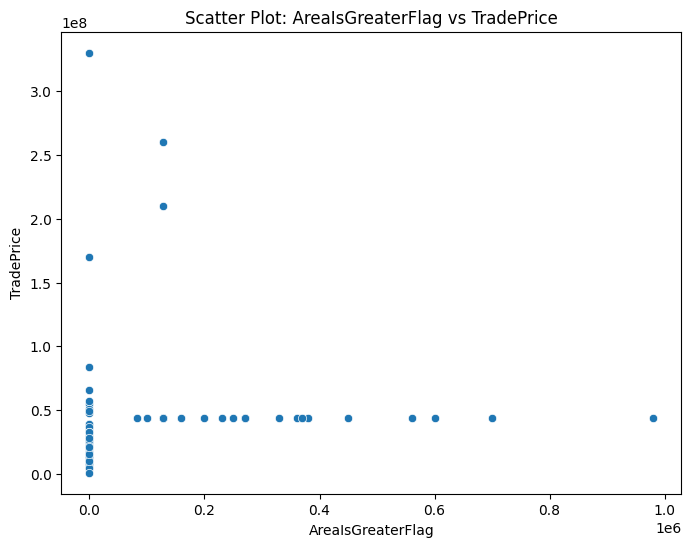

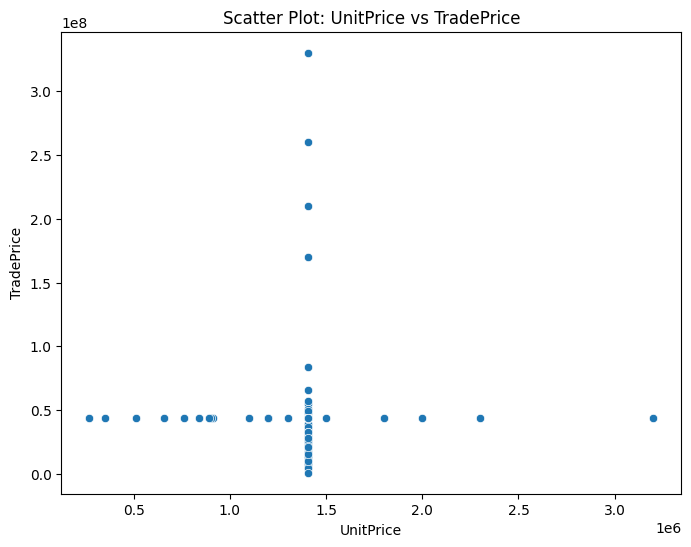

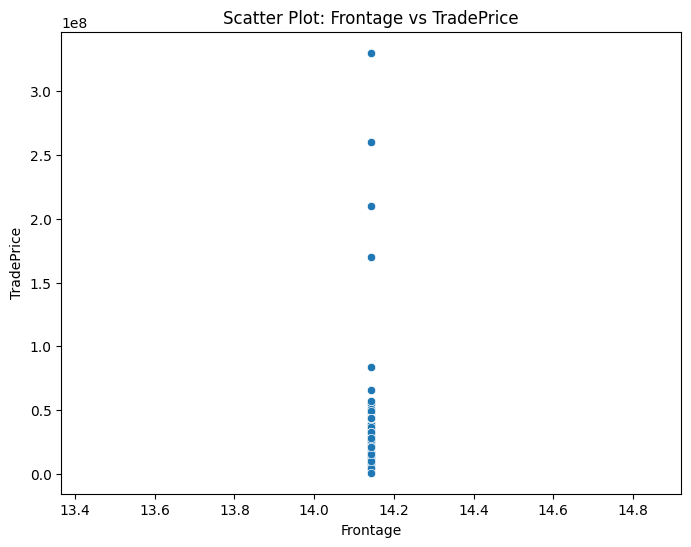

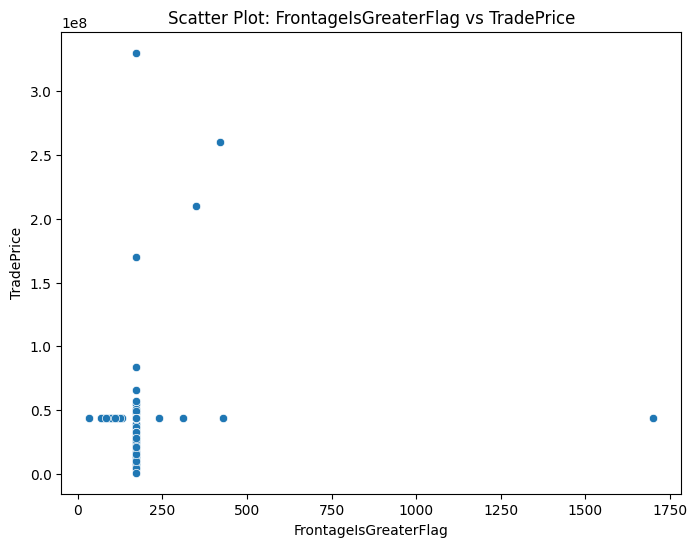

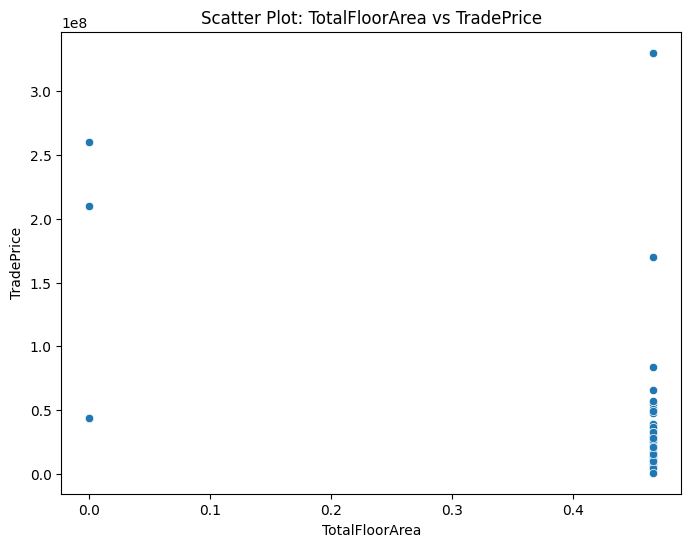

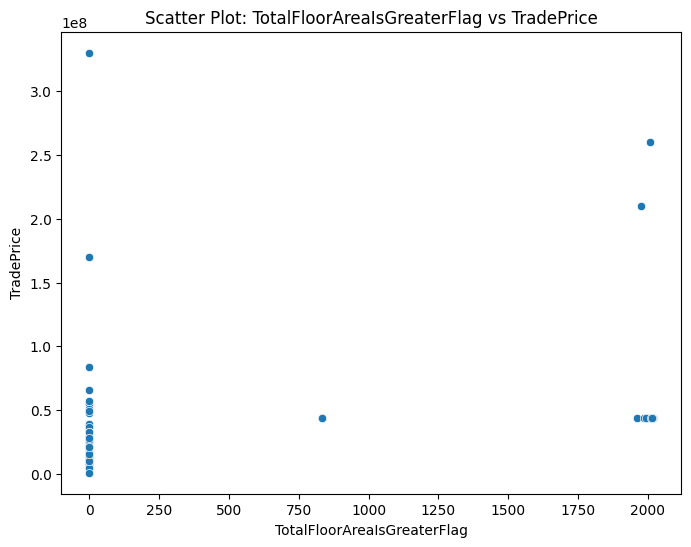

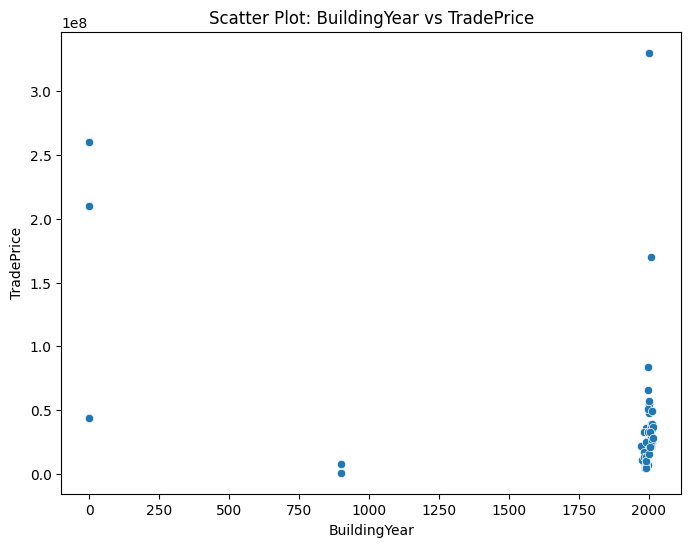

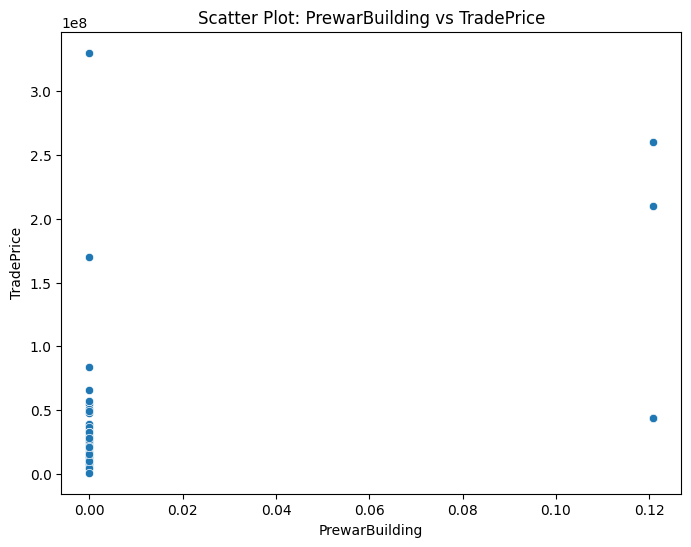

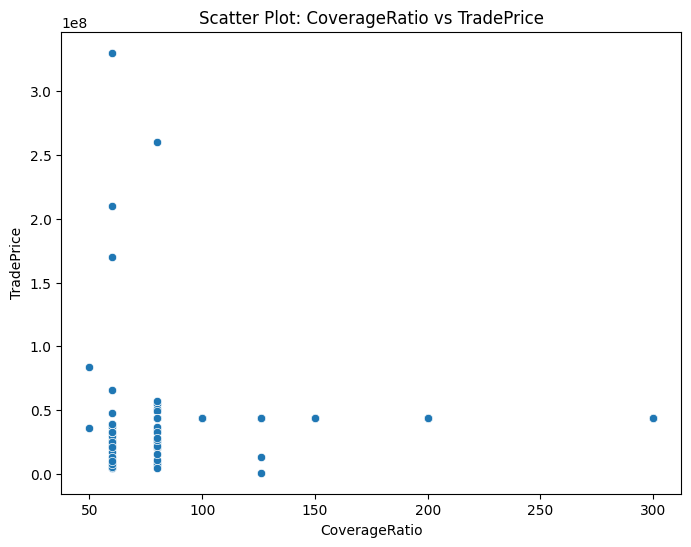

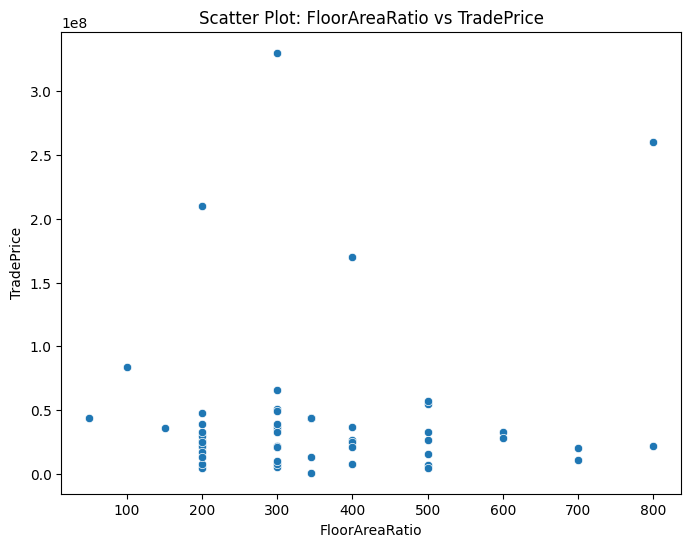

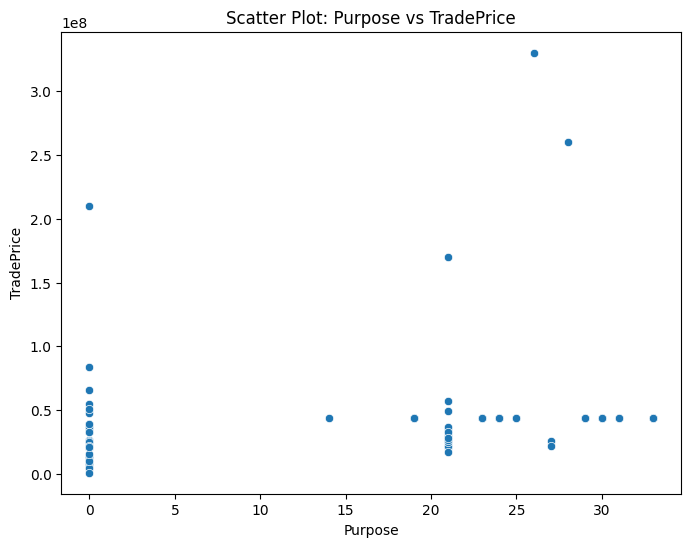

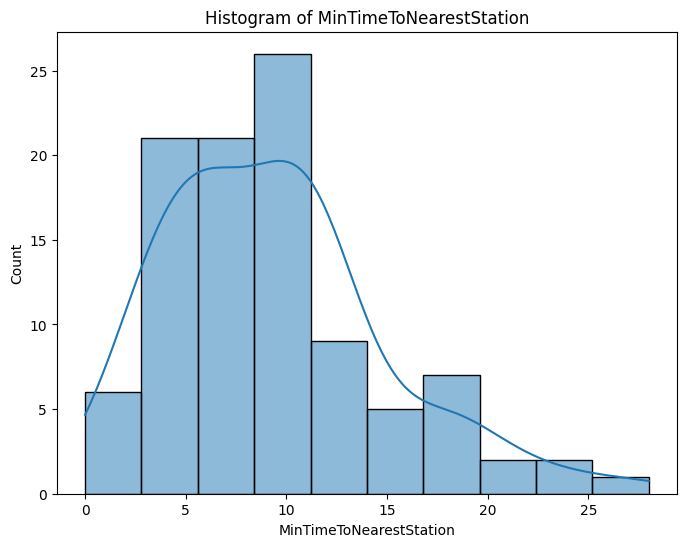

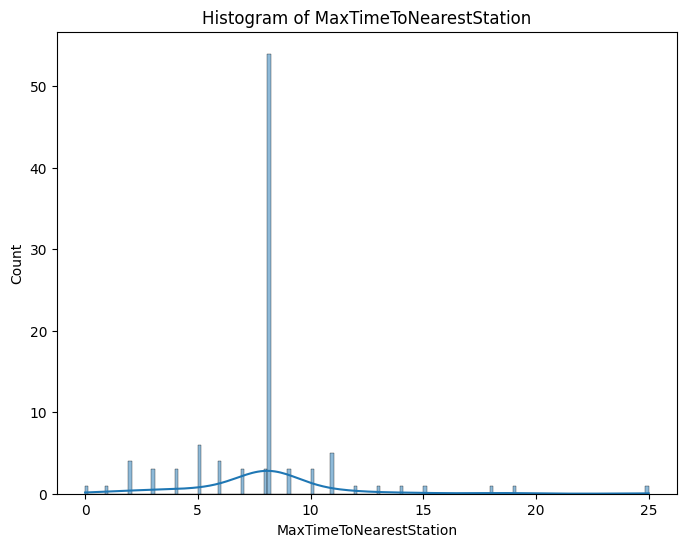

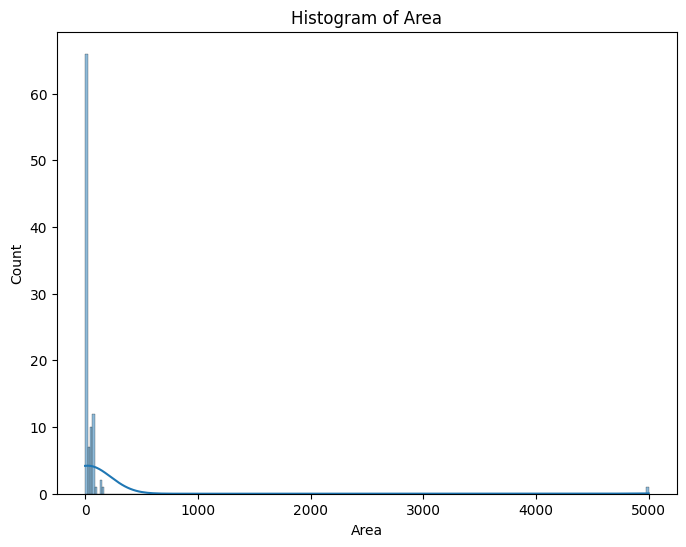

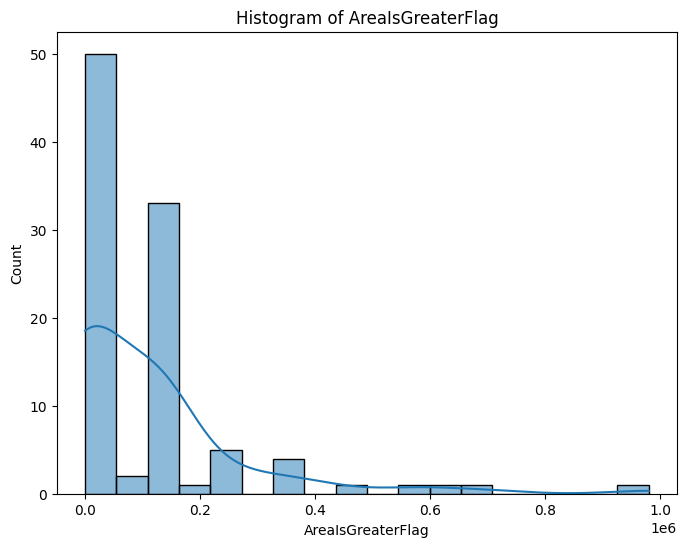

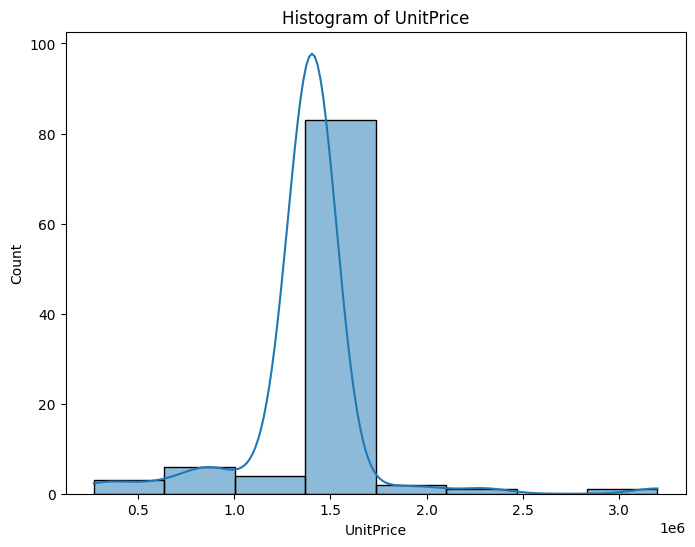

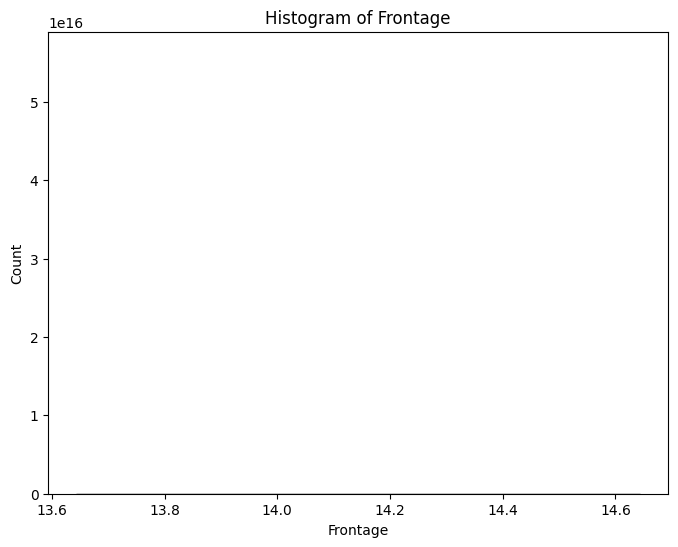

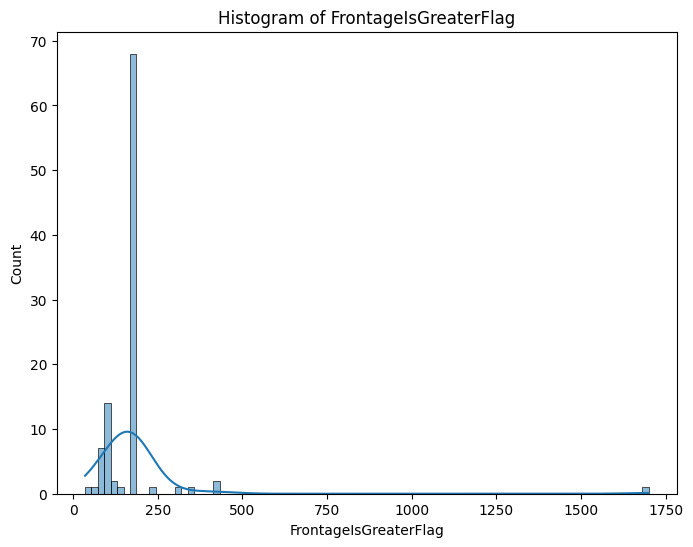

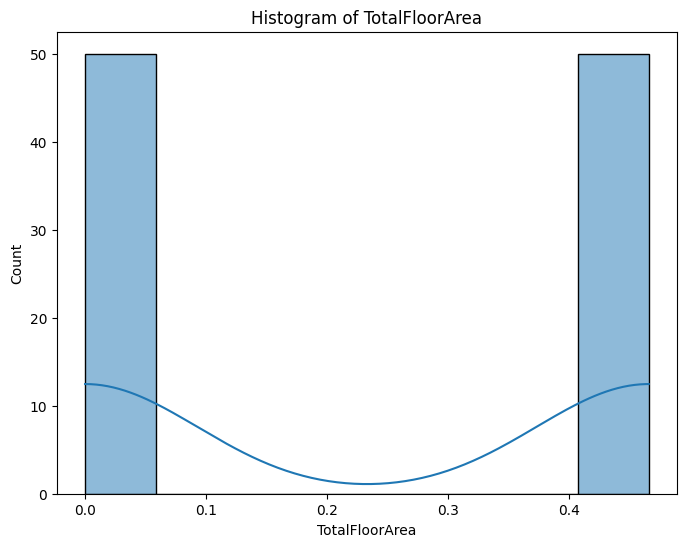

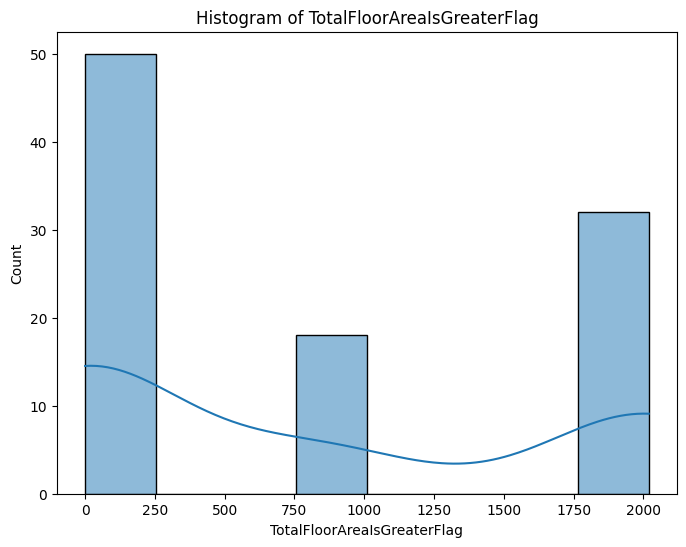

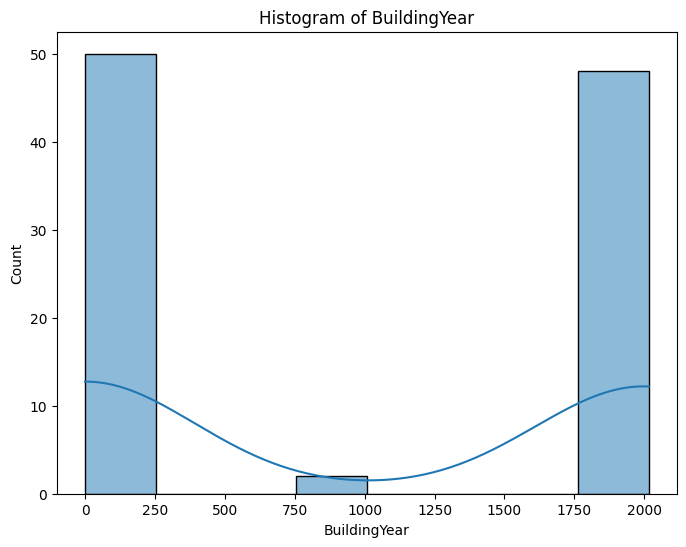

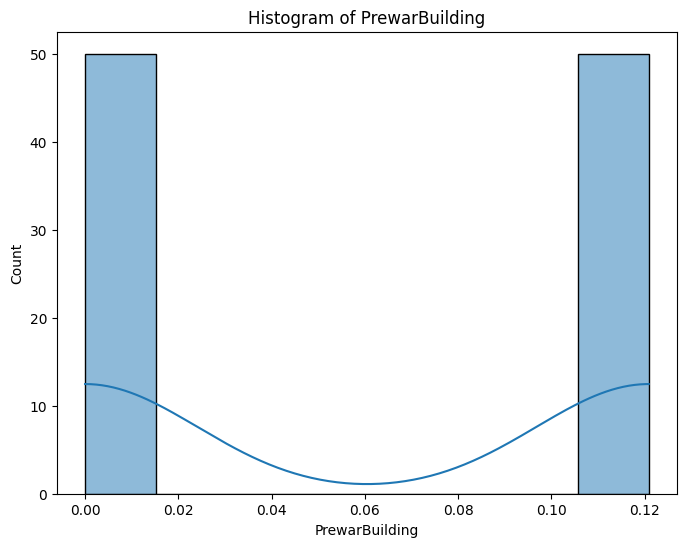

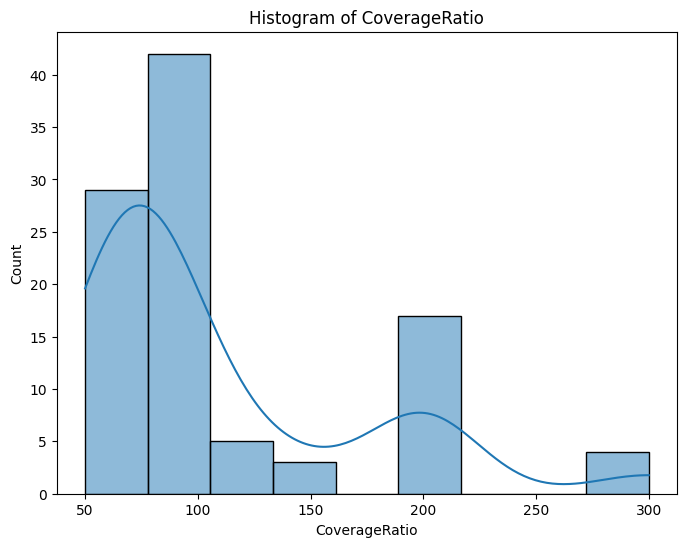

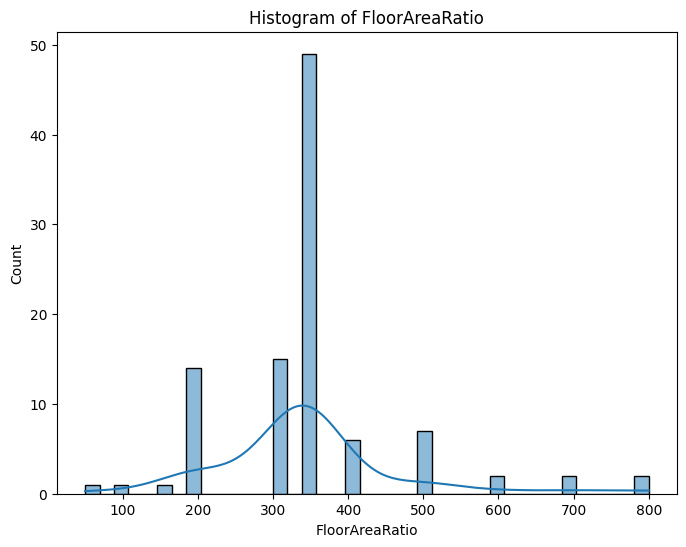

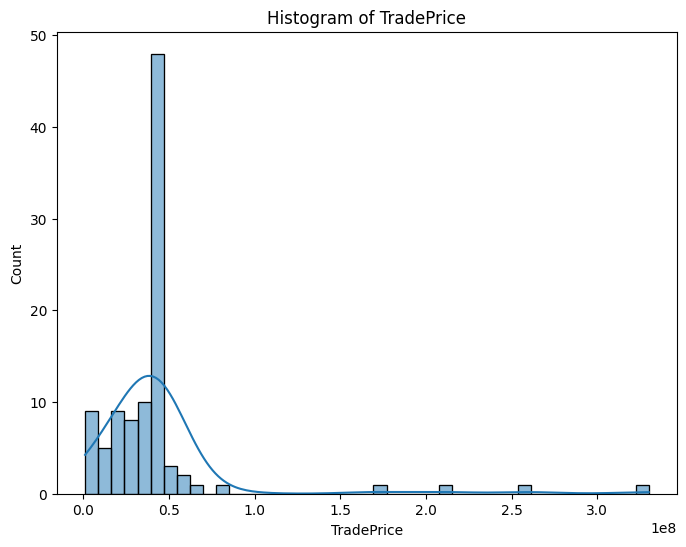

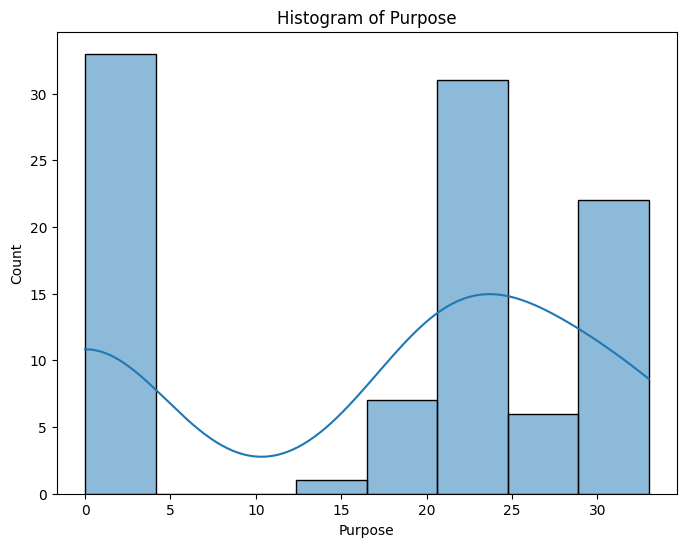

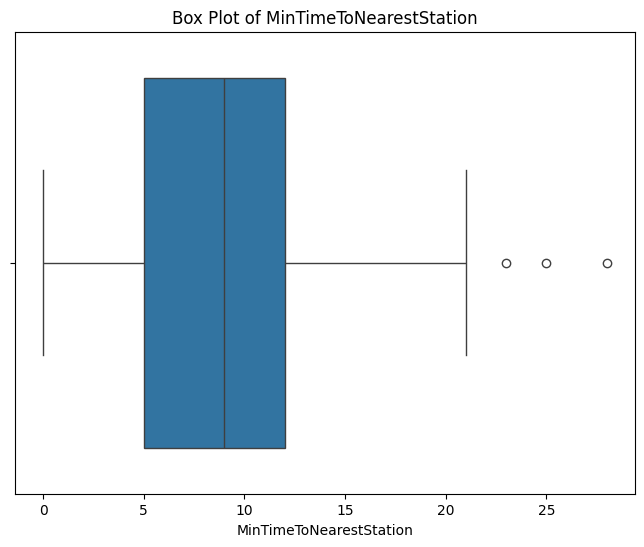

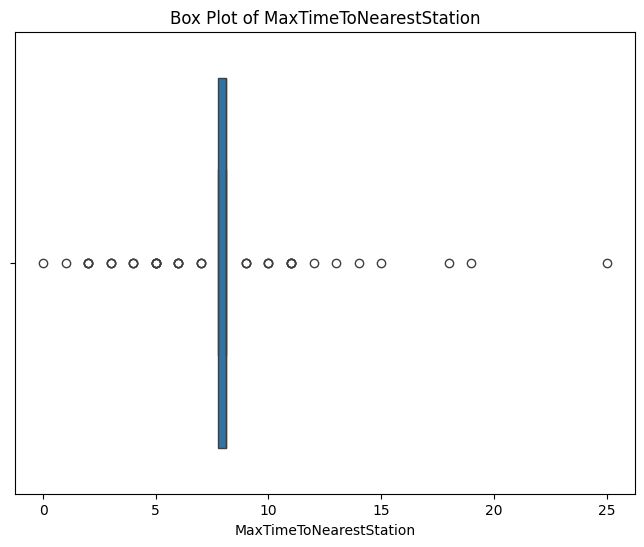

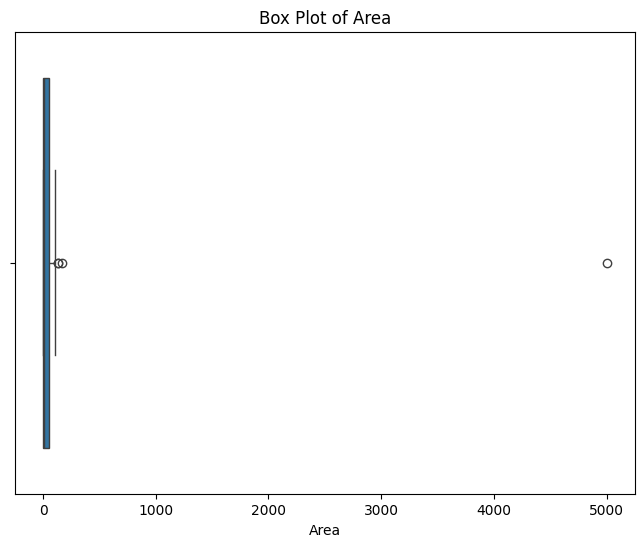

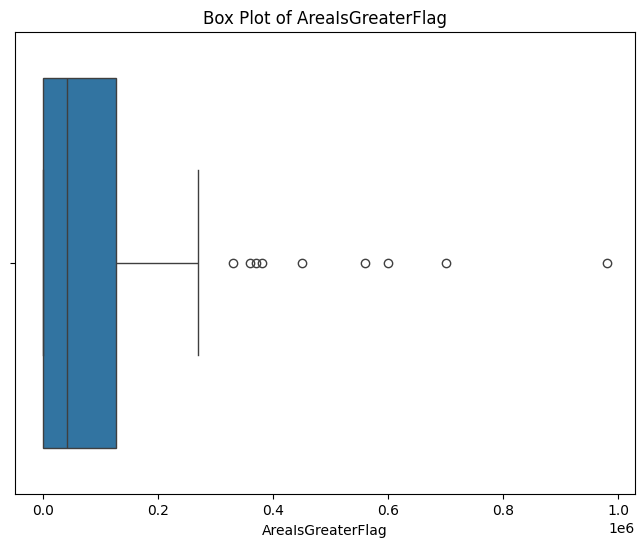

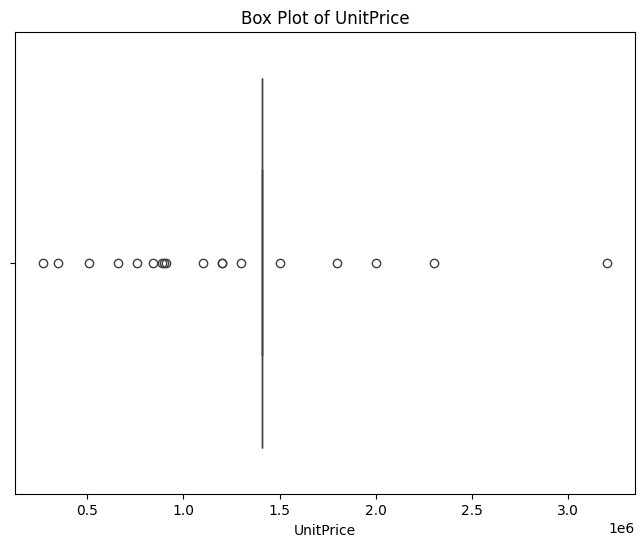

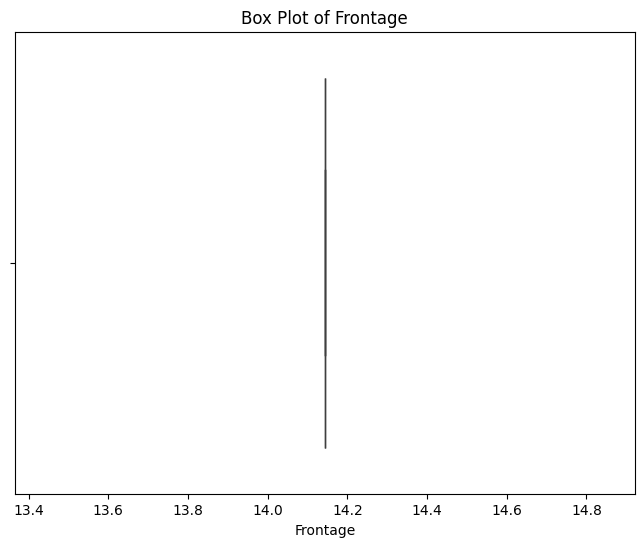

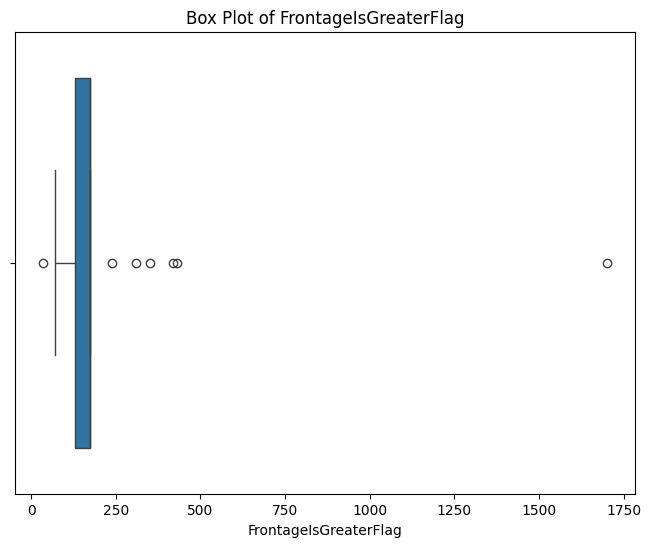

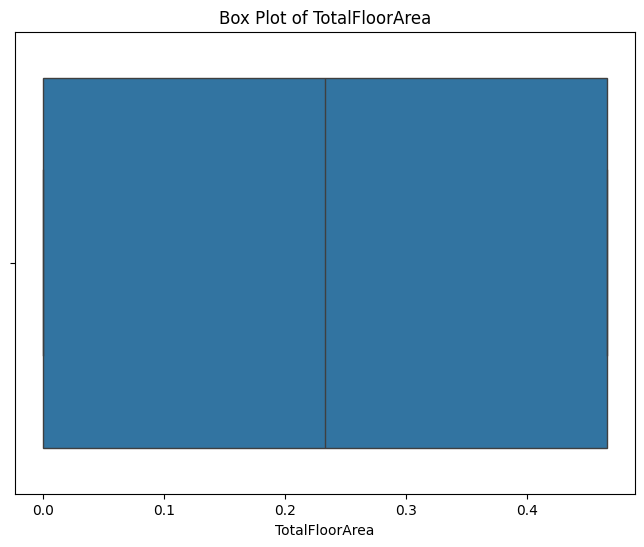

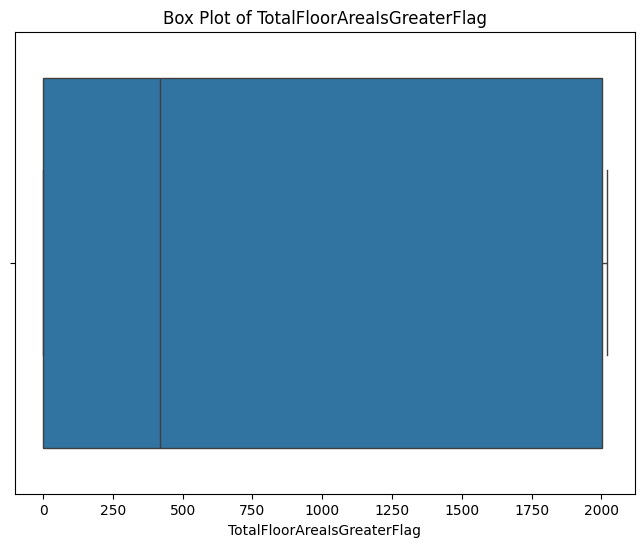

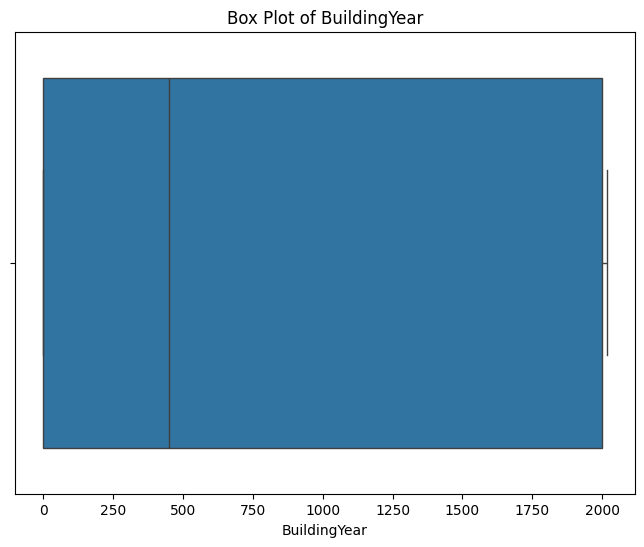

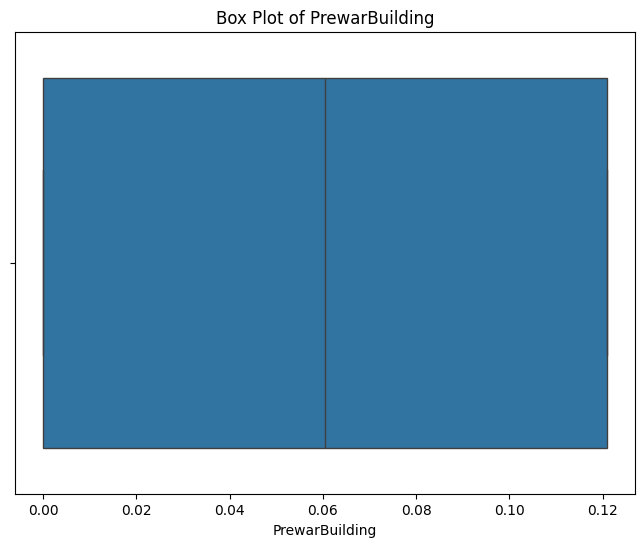

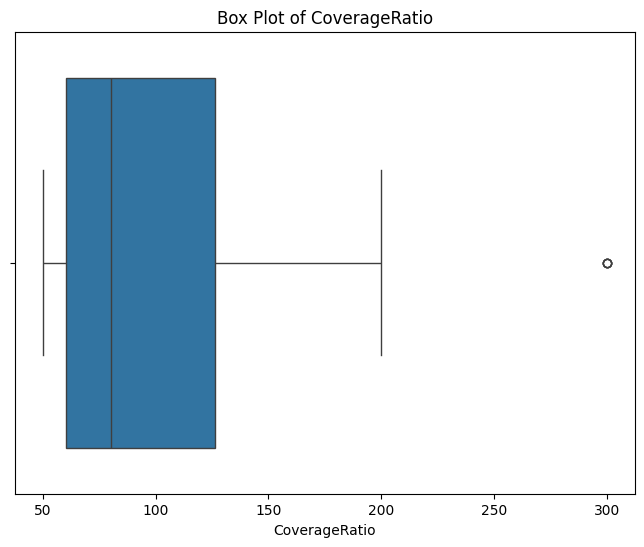

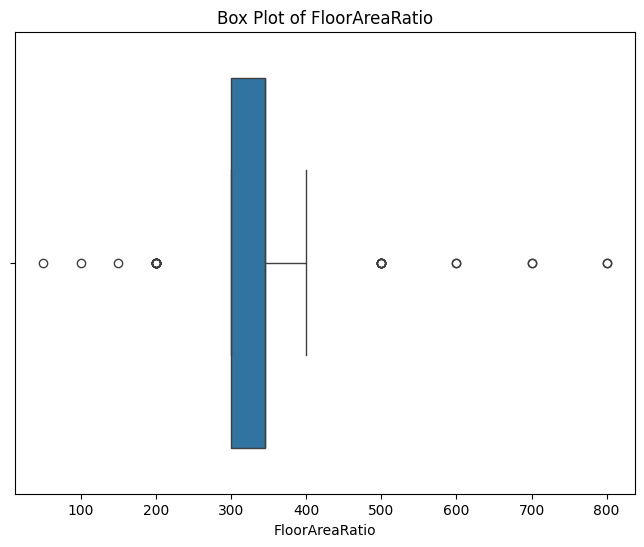

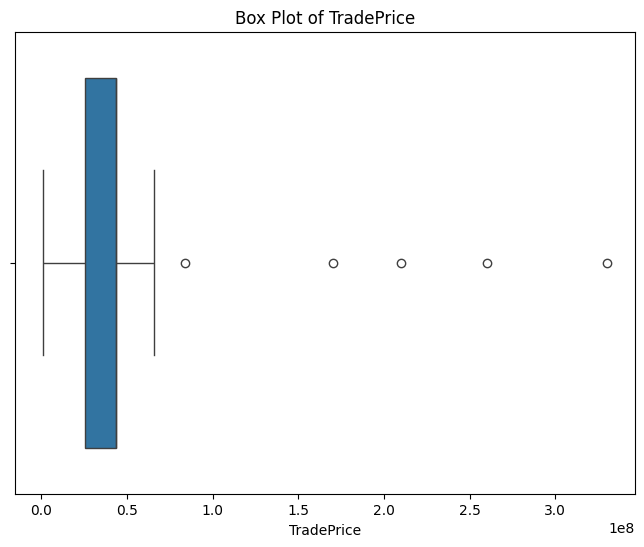

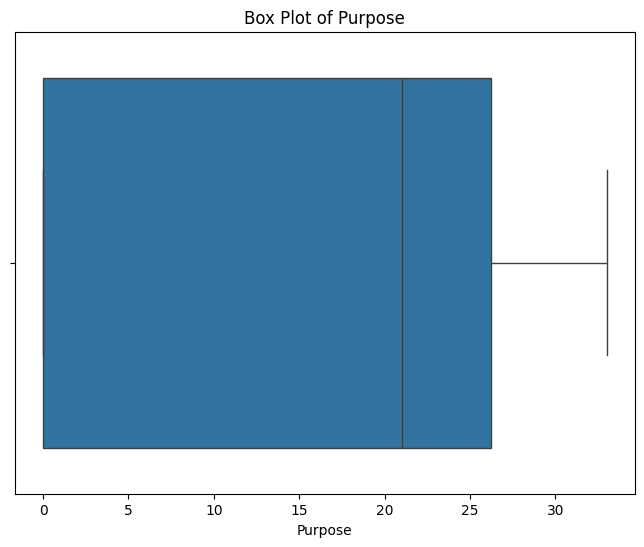

In [84]:
if not df_train_numeric_sample.empty:
  # Correlation matrix for numerical features
  correlation_matrix = df_train_numeric_sample.corr()

  # Visualize the correlation matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
  plt.title('Correlation Matrix')
  plt.show()

  # Scatter plots for numerical features vs. TradePrice
  numerical_features = sample_data.select_dtypes(include=['float64', 'int64']).columns

  for feature in numerical_features:
      if feature != 'TradePrice':
          plt.figure(figsize=(8, 6))
          sns.scatterplot(x=sample_data[feature], y=sample_data['TradePrice'])
          plt.title(f'Scatter Plot: {feature} vs TradePrice')
          plt.xlabel(feature)
          plt.ylabel('TradePrice')
          plt.show()

  # Histograms for numerical features
  for feature in numerical_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(sample_data[feature], kde=True)
      plt.title(f'Histogram of {feature}')
      plt.show()

  # Box plots for numerical features
  for feature in numerical_features:
      plt.figure(figsize=(8, 6))
      sns.boxplot(x=sample_data[feature])
      plt.title(f'Box Plot of {feature}')
      plt.show()

  # Bar plots for categorical features vs. TradePrice
  categorical_features = sample_data.select_dtypes(include=['object', 'category']).columns

  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.barplot(x=sample_data[feature], y=sample_data['TradePrice'])
      plt.title(f'Bar Plot: {feature} vs TradePrice')
      plt.xticks(rotation=45)
      plt.show()
else:
  print("The dataframe is empty.")

totalAreaisgreaterthanflag, totalfloorarea, buildingyear, prewarebuilding removidas por possuirem correlação muito alta(80%+)  a fim de evitar multicolinearidade

In [85]:
columns_to_drop = ['TotalFloorAreaIsGreaterFlag', 'TotalFloorArea', 'BuildingYear', 'PrewarBuilding']
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

Insight 1: Distribuição dos Preços dos Imóveis

Gráfico: Boxplot da variável TradePrice para visualizar a distribuição dos preços dos imóveis.

Insight: Verifique se os preços seguem uma distribuição normal, se há presença de outliers ou se a distribuição é assimétrica.

Insight 2: Relação entre Preço e tamanho(área) do imóvel

Gráfico: Utilize um gráfico de dispersão para analisar a relação entre TradePrice e uma variável relevante (por exemplo, área do imóvel).

Insight: Identifique possíveis correlações ou padrões. Se o preço aumenta com a área, isso pode indicar uma relação positiva entre essas variáveis.

**Começa o treinamento**

Cria-se o X que contém as variáveis independentes (features ou preditoras) que queremos usar:

Como a variavel a ser predita é continua, visto que são valores em ponto flutuante, será escolhido um modelo de regressão, mas especificamente, Árvore de Decisão. Esse modelo é uma escolha comum para problemas de regressão, pois pode capturar relações não lineares e interações entre variáveis. comparar com RandomForestRegressor

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322779 entries, 0 to 325259
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MinTimeToNearestStation  322779 non-null  float64
 1   MaxTimeToNearestStation  322779 non-null  float64
 2   Area                     322779 non-null  float64
 3   AreaIsGreaterFlag        322779 non-null  float64
 4   UnitPrice                322779 non-null  float64
 5   Frontage                 322779 non-null  float64
 6   FrontageIsGreaterFlag    322779 non-null  float64
 7   CoverageRatio            322779 non-null  float64
 8   FloorAreaRatio           322779 non-null  float64
 9   TradePrice               322779 non-null  float64
 10  Purpose                  322779 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 29.6 MB


In [87]:
#df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76950 entries, Pre-owned Condominiums to Pre-owned Condominiums
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MinTimeToNearestStation  76950 non-null  float64
 1   MaxTimeToNearestStation  76950 non-null  float64
 2   Area                     76950 non-null  float64
 3   AreaIsGreaterFlag        76950 non-null  float64
 4   UnitPrice                76950 non-null  float64
 5   Frontage                 76950 non-null  float64
 6   FrontageIsGreaterFlag    76950 non-null  float64
 7   CoverageRatio            76950 non-null  float64
 8   FloorAreaRatio           76950 non-null  float64
 9   TradePrice               0 non-null      float64
 10  Purpose                  76950 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 7.0+ MB


Variaveis continuas foram mantidas visto que modelos de regressão se saem melhor com este tipo de variáveis, as outras variaveis foram descartadas visto que um alto numero de features não melhora o modelo, pelo contrário, tende a prejudica-lo.

Treinamento

A Divisão do Conjunto de Treino (Train/Validation Split) foi a abordagem de validação escolhida visto que a Validação Cruzada (Cross-Validation) é recomendada para conjuntos de dados menores.

In [88]:
# Separar as features e o alvo do conjunto de treino
X_train = df_train.drop('TradePrice', axis=1)
y_train = df_train['TradePrice']

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Dividir os dados de treino em conjunto de treino e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = DecisionTreeRegressor(random_state=42)

model.fit(X_train_split, y_train_split)
model2.fit(X_train_split, y_train_split)

DecisionTreeRegressor(random_state=42)

Validação

RandomForestRegressor

In [89]:
# Fazer previsões no conjunto de validação
y_val_pred = model.predict(X_val_split)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_val_split, y_val_pred)
msle = mean_squared_log_error(y_val_split, y_val_pred)
rmsle = np.sqrt(msle)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"RMSLE: {rmsle}")

Mean Absolute Percentage Error (MAPE): 96.79%
RMSLE: 0.3798863236422688


DecisionTreeRegressor

In [90]:
# Fazer previsões no conjunto de validação
y_val_pred = model2.predict(X_val_split)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_val_split, y_val_pred)
msle = mean_squared_log_error(y_val_split, y_val_pred)
rmsle = np.sqrt(msle)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"RMSLE: {rmsle}")

Mean Absolute Percentage Error (MAPE): 1.74%
RMSLE: 0.38495447934207266



Ao utilizar o modelo RandomForestRegressor o fato de o MAPE ser muito alto e o RMSLE estar em um nível moderado sugere que o modelo pode estar cometendo grandes erros relativos em valores menores, já que o MAPE penaliza erros relativos em valores baixos, enquanto o RMSLE trata melhor essas discrepâncias ao focar em diferenças logarítmicas.

Já ao utilizar o DecisionTreeRegressor o MAPE de 1.74% significa que o erro percentual médio nas previsões é muito baixo, indicando que o modelo está prevendo os valores com alta precisão. Esse valor é excelente para a maioria dos casos, sugerindo que o modelo está acertando bem, inclusive para valores pequenos. Um RMSLE de 0.385, embora um pouco maior do que o MAPE sugere, ainda indica que o modelo está desempenhando bem, especialmente em termos de logaritmos. Isso pode sugerir que o modelo é robusto em relação a diferenças relativas entre os valores grandes e pequenos.

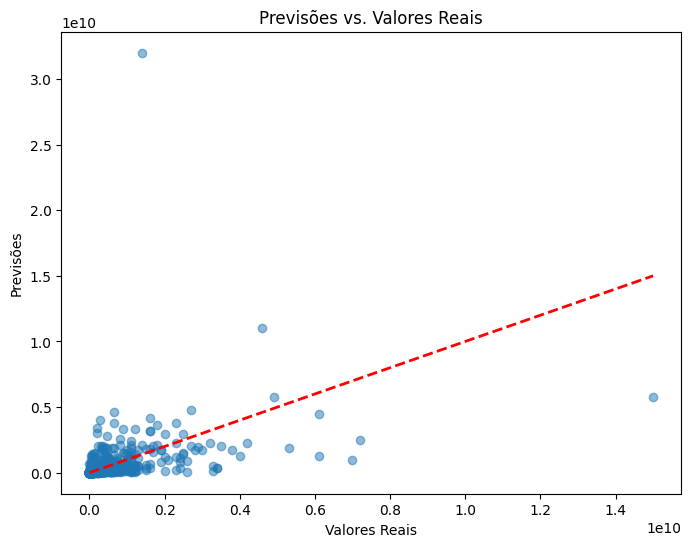

In [91]:
# Gráfico de dispersão das previsões vs. valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_val_split, y_val_pred, alpha=0.5)
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()

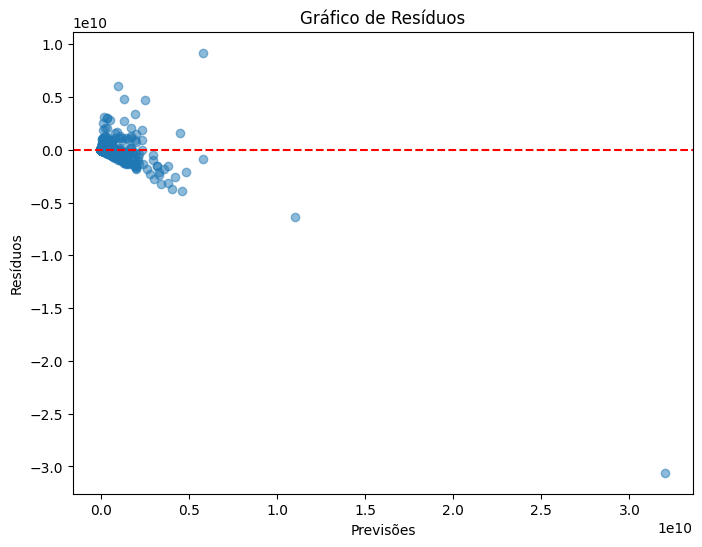

In [92]:
# Calcular os resíduos
residuos = y_val_split - y_val_pred

# Gráfico de resíduos
plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, residuos, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

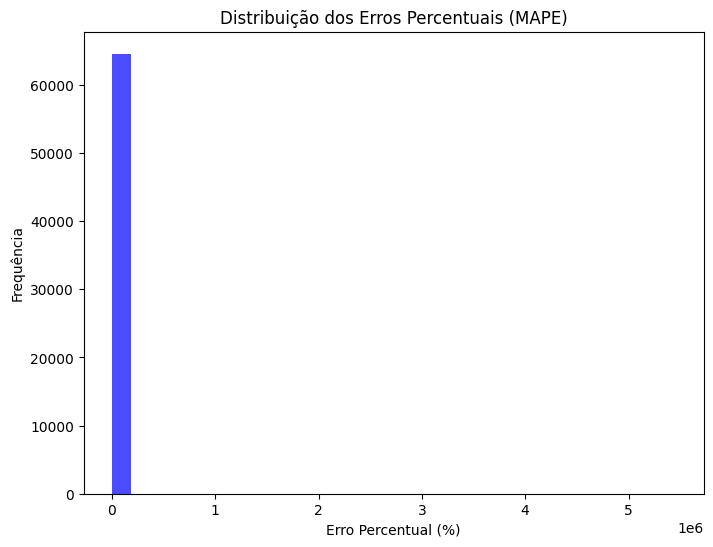

In [93]:
# Calcular o erro percentual para MAPE
percentual_erro = np.abs((y_val_split - y_val_pred) / y_val_split) * 100

# Histograma dos erros percentuais
plt.figure(figsize=(8, 6))
plt.hist(percentual_erro, bins=30, alpha=0.7, color='b')
plt.xlabel('Erro Percentual (%)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Erros Percentuais (MAPE)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


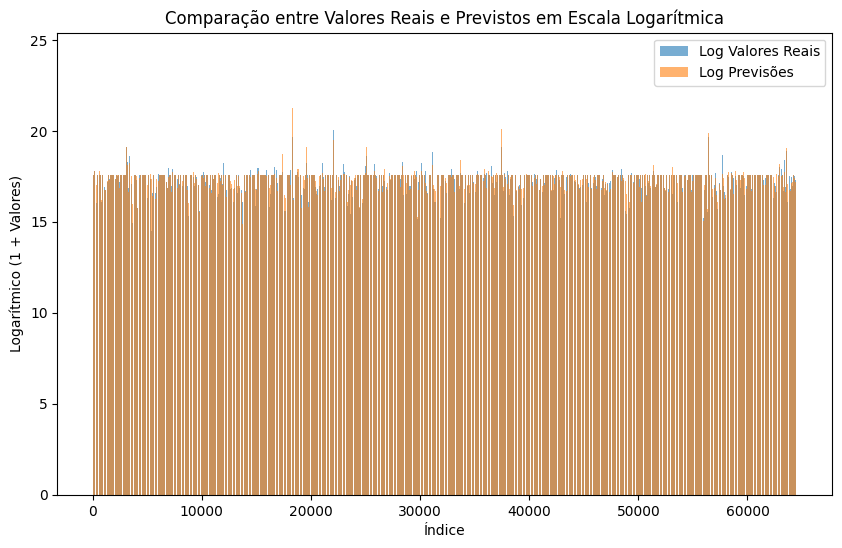

In [94]:
# Comparar os valores reais e os valores previstos logarítmicos
y_val_log = np.log1p(y_val_split)
y_pred_log = np.log1p(y_val_pred)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_val_log)), y_val_log, alpha=0.6, label='Log Valores Reais')
plt.bar(range(len(y_pred_log)), y_pred_log, alpha=0.6, label='Log Previsões')
plt.xlabel('Índice')
plt.ylabel('Logarítmico (1 + Valores)')
plt.title('Comparação entre Valores Reais e Previstos em Escala Logarítmica')
plt.legend()
plt.show()

Teste

In [95]:
# Preparar o conjunto de teste (somente as features, já que TradePrice é nulo)
X_test = df_test.drop('TradePrice', axis=1)

X_test_scaled = scaler.transform(X_test) # padronizado

# Fazer previsões no conjunto de teste
y_pred = model2.predict(X_test_scaled)

# adicionar as previsões ao df_test
df_test['Predicted_TradePrice'] = y_pred

Visualização dos resultados


In [97]:
print(df_train['TradePrice'].describe())

count    3.227790e+05
mean     4.375803e+07
std      1.321678e+08
min      1.000000e+00
25%      2.700000e+07
50%      4.363526e+07
75%      4.363526e+07
max      3.200000e+10
Name: TradePrice, dtype: float64


In [98]:
print(df_test['Predicted_TradePrice'].describe())

count    7.695000e+04
mean     3.921426e+07
std      6.617467e+07
min      2.015000e+03
25%      2.802703e+07
50%      4.363526e+07
75%      4.363526e+07
max      4.600000e+09
Name: Predicted_TradePrice, dtype: float64


Acredito que o dataset de teste, no geral, possui imóveis menores e com menor valor de mercado que os apresentados nos dados de treinamento

In [100]:
df1 = df_train.copy()

# Get the length of the smaller dataset
min_length = len(df_test)

# Truncate the larger dataset
df1_reduced = df1.iloc[:min_length]

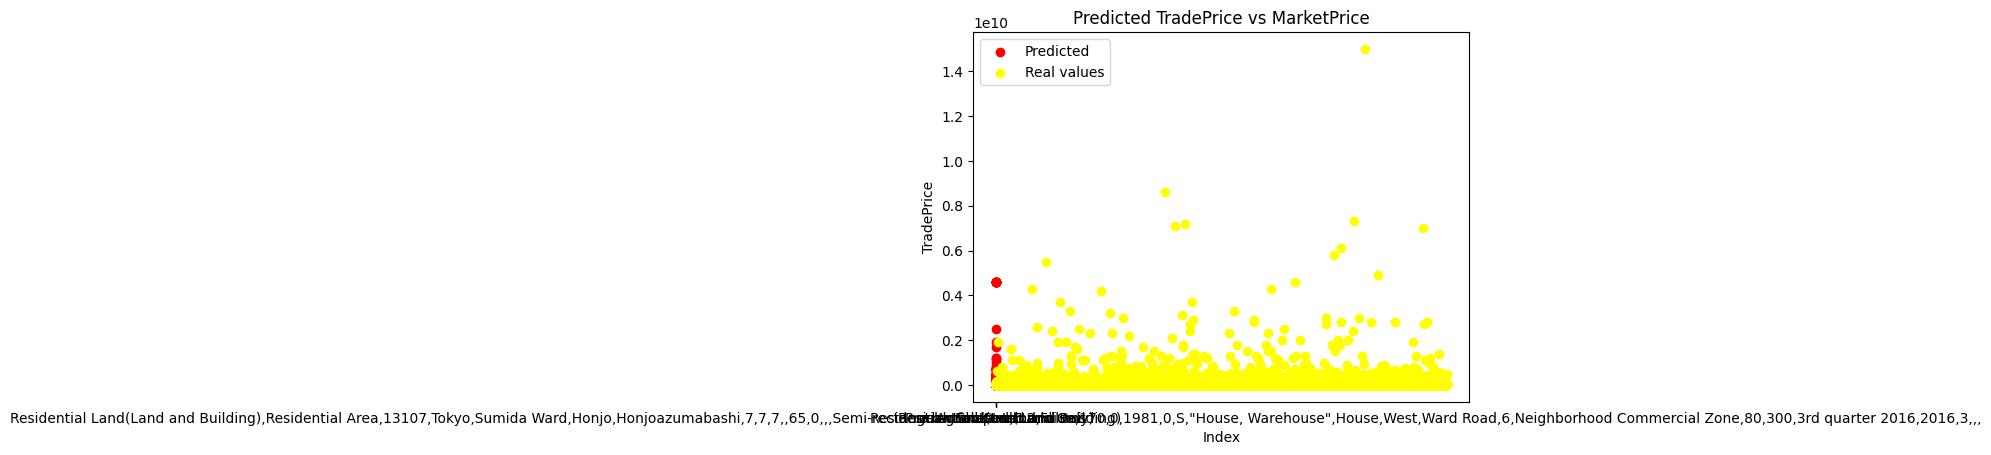

In [104]:
plt.scatter(df_test.index, df_test['Predicted_TradePrice'], label='Predicted', color='red')
plt.scatter(df1_reduced.index, df1_reduced['TradePrice'], label='Real values', color='yellow')
plt.legend()
plt.xlabel('Index')
plt.ylabel('TradePrice')
plt.title('Predicted TradePrice vs MarketPrice')
plt.show()


In [105]:
baseline_pred = df_train['TradePrice'].mean()  # Usando a média do conjunto de treino
df_test['Baseline_TradePrice'] = baseline_pred

# Comparando a diferença entre o modelo atual e o baseline
df_test['Diff_vs_Baseline'] = df_test['Predicted_TradePrice'] - df_test['Baseline_TradePrice']
df_test[['Predicted_TradePrice', 'Baseline_TradePrice', 'Diff_vs_Baseline']].head()

,Predicted_TradePrice,Baseline_TradePrice,Diff_vs_Baseline
Pre-owned Condominiums,1.709388e+07,4.375803e+07,-2.666415e+07
Pre-owned Condominiums,2.485469e+07,4.375803e+07,-1.890334e+07
Pre-owned Condominiums,2.600000e+07,4.375803e+07,-1.775803e+07
Pre-owned Condominiums,2.464531e+07,4.375803e+07,-1.911271e+07
"Residential Land(Land and Building),Residential Area,13107,Tokyo,Sumida Ward,Honjo,Honjoazumabashi,7,7,7,,65,0,,,Semi-rectangular Shaped,6.2,False,170,0,1981,0,S,""House, Warehouse"",House,West,Ward Road,6,Neighborhood Commercial Zone,80,300,3rd quarter 2016,2016,3,,,",4.363526e+07,4.375803e+07,-1.227625e+05


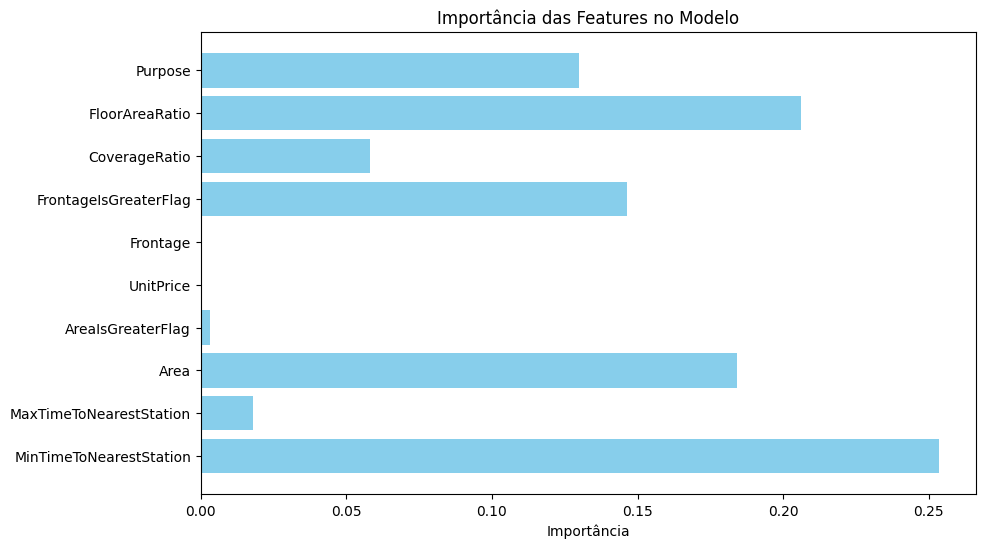

In [106]:
# Obtendo a importância das features do modelo
importances = model2.feature_importances_
features = X_test.columns

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.show()